# 4.10 Part 4 - Additional insights

### This script contains the following points:

#### 1. Import libraries
#### 2. Import data
#### 3. Additional insights
##### 3.1 Family status crossed with loyalty flag
##### 3.2 Order frequency by dept
##### 3.3 Price range comparison
##### 3.4 Ordering habits by loyalty

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import data

In [2]:
# project folder path

path = r'C:\Users\Odette\Desktop\CareerFoundry\Immersion Courses\Course 4\Instacart Basket Analysis'

In [3]:
# import of orders_products data

final_df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'Instacart_final2.pkl'))

In [4]:
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status
0,2539329,1,1,2,8,0,196,1,False,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
1,2398795,1,2,3,7,15,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
2,473747,1,3,3,12,21,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
3,2254736,1,4,4,7,29,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent
4,431534,1,5,4,15,28,196,1,True,Soda,...,2019-02-17,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent


In [5]:
final_df.shape

(30964564, 35)

# Additional insights

### Family status crossed with loyalty flag

In [6]:
# crosstab of fam_status & loyalty_flag variables

xtab_fam_loyalty = pd.crosstab(final_df['fam_status'], final_df['loyalty_flag'], dropna = False)

In [7]:
xtab_fam_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,882722,403781,1358768
living with parents and siblings,492749,221779,766644
married,7202500,3380651,11160560
single,1706122,797484,2590804


In [8]:
xtab_fam_loyalty.to_clipboard()

### Order frequency by dept

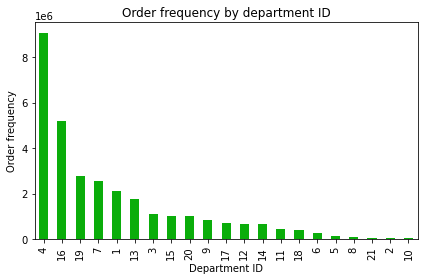

In [9]:
# bar chart based on orders by department_id

dept_bar = final_df['department_id'].value_counts().plot.bar(color =['#0AAD0A'], xlabel= 'Department ID', ylabel= 'Order frequency', title = 'Order frequency by department ID')
plt.tight_layout()

In [10]:
# export chart in the form of an image file

dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_frequency.png'))

### Price range comparison

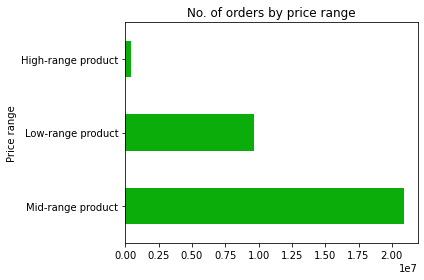

In [11]:
# bar chart based on orders by department_id

price_range_bar = final_df['price_range_loc'].value_counts().plot.barh(color =['#0AAD0A'], xlabel= 'Price range', ylabel= 'No. of orders', title = 'No. of orders by price range')
plt.tight_layout()

In [12]:
# export chart in the form of an image file

price_range_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'))

### Ordering habits by loyalty

In [23]:
# create crosstab of loyalty_flag & price_range_loc variables

xtab_avgorder_pricerange = pd.crosstab(final_df['loyalty_flag'], final_df['price_range_loc'], dropna = False)

In [24]:
xtab_avgorder_pricerange

price_range_loc,High-range product,Low-range product,Mid-range product
loyalty_flag,,,
Loyal customer,119936,3214690,6949467
New customer,65927,1501288,3236480
Regular customer,212090,4958862,10705824


In [32]:
xtab_avgorder_pricerange.to_clipboard()

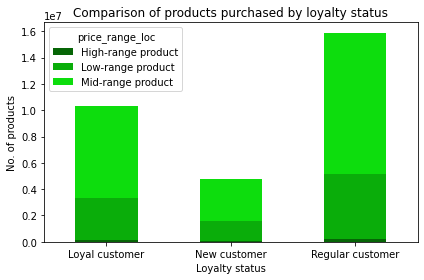

In [33]:
# stacked bar chart based on loyalty_flag and price_range_loc

stacked_order_price = xtab_avgorder_pricerange.plot.bar(color =['#066506', '#0AAD0A', '#0ddd0d'], title = 'Comparison of products purchased by loyalty status', xlabel= 'Loyalty status', ylabel= 'No. of products', stacked = True)
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

In [34]:
# export chart in the form of an image file

stacked_order_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'stackedbar_price_loyalty.png'))